## 1. Data Import & Initial Assessment

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load dataset
df = pd.read_csv('/content/kidney_disease.csv')

print(f"Dataset loaded: {df.shape[0]:,} observations × {df.shape[1]} features")
print(f"Memory footprint: {df.memory_usage(deep=True).sum()/1024**2:.1f} MB")

Dataset loaded: 400 observations × 26 features
Memory footprint: 0.3 MB


In [256]:
# Dataset overview
print("Dataset Structure:")
df.info()

print("\nSample Records:")
display(df.head())

print("\nData Types Summary:")
print(df.dtypes.value_counts().to_dict())

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd



Data Types Summary:
{dtype('O'): 14, dtype('float64'): 11, dtype('int64'): 1}


In [257]:
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)
df


,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

## 2. Data Quality Assessment

In [259]:
# Missing data analysis
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df) * 100).round(2)

quality_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct,
    'Data_Type': df.dtypes
})

# Filter and display problematic columns
issues = quality_summary[quality_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(issues) > 0:
    print("Data Quality Issues:")
    display(issues)

    # Visualization for missing data
    if len(issues) <= 10:
        plt.figure(figsize=(10, 5))
        sns.barplot(data=issues.reset_index(), y='index', x='Missing_Percentage', orient='h')
        plt.title('Missing Data Analysis')
        plt.xlabel('Missing Data (%)')
        plt.tight_layout()
        plt.show()
else:
    print("✅ Data quality check passed - no missing values detected")

Data Quality Issues:


,Missing_Count,Missing_Percentage,Data_Type
red_blood_cells,152,38.00,object
red_blood_cell_count,130,32.50,object
white_blood_cell_count,105,26.25,object
potassium,88,22.00,float64
sodium,87,21.75,float64
packed_cell_volume,70,17.50,object
pus_cell,65,16.25,object
hemoglobin,52,13.00,float64
sugar,49,12.25,float64
specific_gravity,47,11.75,float64


In [260]:
# Convert specified columns to numeric, coercing errors
cols_to_convert_to_float = ['red_blood_cell_count', 'white_blood_cell_count', 'packed_cell_volume']

for col in cols_to_convert_to_float:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [261]:
# Identify columns with more than 20% missing data
missing_threshold = 20
cols_with_high_missing = missing_pct[missing_pct > missing_threshold].index.tolist()

print(f"Columns with more than {missing_threshold}% missing data:")
print(cols_with_high_missing)

# Separate columns by data type
numeric_cols_high_missing = df[cols_with_high_missing].select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_high_missing = df[cols_with_high_missing].select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumeric columns with high missing data: {numeric_cols_high_missing}")
print(f"Categorical columns with high missing data: {categorical_cols_high_missing}")

# Impute missing values for numeric columns with the median
for col in numeric_cols_high_missing:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Impute missing values for categorical columns with the mode
for col in categorical_cols_high_missing:
    if col in df.columns:
        # Calculate mode, handle potential multiple modes by taking the first
        mode_val = df[col].mode()
        if not mode_val.empty:
            df[col].fillna(mode_val[0], inplace=True)
        else:
            print(f"Warning: Could not determine mode for categorical column '{col}'. Missing values not imputed.")

print("\nMissing values after imputation:")
print(df[cols_with_high_missing].isnull().sum())

Columns with more than 20% missing data:
['red_blood_cells', 'sodium', 'potassium', 'white_blood_cell_count', 'red_blood_cell_count']

Numeric columns with high missing data: ['sodium', 'potassium', 'white_blood_cell_count', 'red_blood_cell_count']
Categorical columns with high missing data: ['red_blood_cells']

Missing values after imputation:
red_blood_cells           0
sodium                    0
potassium                 0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64


In [262]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows.")
    # Display duplicate rows if needed
    # display(df[df.duplicated(keep=False)])
else:
    print("No duplicate rows found.")

No duplicate rows found.


## 3. Variable Classification & Summary Statistics

In [263]:
# Classify variables by type
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"Variable Classification:")
print(f"• Numeric: {len(numeric_cols)} variables")
print(f"• Categorical: {len(categorical_cols)} variables")
print(f"• DateTime: {len(datetime_cols)} variables")

# Summary statistics for numeric variables
if numeric_cols:
    print("\nDescriptive Statistics (Numeric Variables):")
    display(df[numeric_cols].describe().round(2))

Variable Classification:
• Numeric: 15 variables
• Categorical: 11 variables
• DateTime: 0 variables

Descriptive Statistics (Numeric Variables):


,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,400.00,391.00,388.00,353.00,354.00,351.00,356.00,381.00,383.00,400.00,400.00,348.00,329.00,400.00,400.00
mean,199.50,51.48,76.47,1.02,1.02,0.45,148.04,57.43,3.07,137.63,4.58,12.53,38.88,8298.50,4.74
std,115.61,17.17,13.68,0.01,1.35,1.10,79.28,50.50,5.74,9.21,2.82,2.91,8.99,2529.59,0.84
min,0.00,2.00,50.00,1.00,0.00,0.00,22.00,1.50,0.40,4.50,2.50,3.10,9.00,2200.00,2.10
25%,99.75,42.00,70.00,1.01,0.00,0.00,99.00,27.00,0.90,135.00,4.00,10.30,32.00,6975.00,4.50
50%,199.50,55.00,80.00,1.02,0.00,0.00,121.00,42.00,1.30,138.00,4.40,12.65,40.00,8000.00,4.80
75%,299.25,64.50,80.00,1.02,2.00,0.00,163.00,66.00,2.80,141.00,4.80,15.00,45.00,9400.00,5.10
max,399.00,90.00,180.00,1.02,5.00,5.00,490.00,391.00,76.00,163.00,47.00,17.80,54.00,26400.00,8.00


In [264]:
# Drop the 'id' column as it is not useful for analysis
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
    print("Dropped 'id' column.")
else:
    print("'id' column not found in DataFrame.")

df.info()

Dropped 'id' column.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemog

In [265]:
# Clean 'diabetes_mellitus' column: remove '\t'
df['diabetes_mellitus'] = df['diabetes_mellitus'].str.replace('\t', '', regex=False)

# Identify the mode after initial cleaning
mode_diabetes = df['diabetes_mellitus'].mode()

if not mode_diabetes.empty:
    # Fill missing values (including those that were originally nan) with the mode
    df['diabetes_mellitus'].fillna(mode_diabetes[0], inplace=True)
else:
    print("Warning: Could not determine mode for 'diabetes_mellitus'. Missing values not imputed.")

# Ensure only 'yes' and 'no' values are present (handle potential remaining inconsistencies if any)
# This step might be redundant if the mode is 'yes' or 'no' and no other values exist after replace/fillna,
# but it acts as a safeguard.
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({' yes': 'yes', ' no': 'no'})


# Verify the unique values after cleaning
print("Unique values in 'diabetes_mellitus' after cleaning:")
print(df['diabetes_mellitus'].unique())

Unique values in 'diabetes_mellitus' after cleaning:
['yes' 'no']


In [266]:
# Clean 'coronary_artery_disease' column: remove '\t' and ensure 'yes' or 'no' only
df['coronary_artery_disease'] = df['coronary_artery_disease'].str.replace('\t', '', regex=False)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace({' yes': 'yes', ' no': 'no'})

# Identify the mode after initial cleaning to fill potential NaNs if any
mode_cad = df['coronary_artery_disease'].mode()
if not mode_cad.empty:
    df['coronary_artery_disease'].fillna(mode_cad[0], inplace=True)
else:
    print("Warning: Could not determine mode for 'coronary_artery_disease'. Missing values not imputed.")


# Verify the unique values after cleaning
print("Unique values in 'coronary_artery_disease' after cleaning:")
print(df['coronary_artery_disease'].unique())

Unique values in 'coronary_artery_disease' after cleaning:
['no' 'yes']


In [267]:
# Ensure 'class' column contains only 'ckd' and 'notckd'
# This step is a safeguard after previous cleaning attempts
df['class'] = df['class'].replace({'ckd\t': 'ckd', ' notckd': 'notckd'})

# Verify the unique values after cleaning
print("Unique values in 'class' after cleaning:")
print(df['class'].unique())

Unique values in 'class' after cleaning:
['ckd' 'notckd']


In [268]:
# Create a new numerical column for 'class'
df['class_numerical'] = df['class'].map({'ckd': 1, 'notckd': 0})

# Verify the creation of the new column and its values
print("Unique values in 'class_numerical':")
print(df['class_numerical'].unique())
print("\nData type of 'class_numerical':")
print(df['class_numerical'].dtype)

Unique values in 'class_numerical':
[1 0]

Data type of 'class_numerical':
int64


## 4. Univariate Analysis

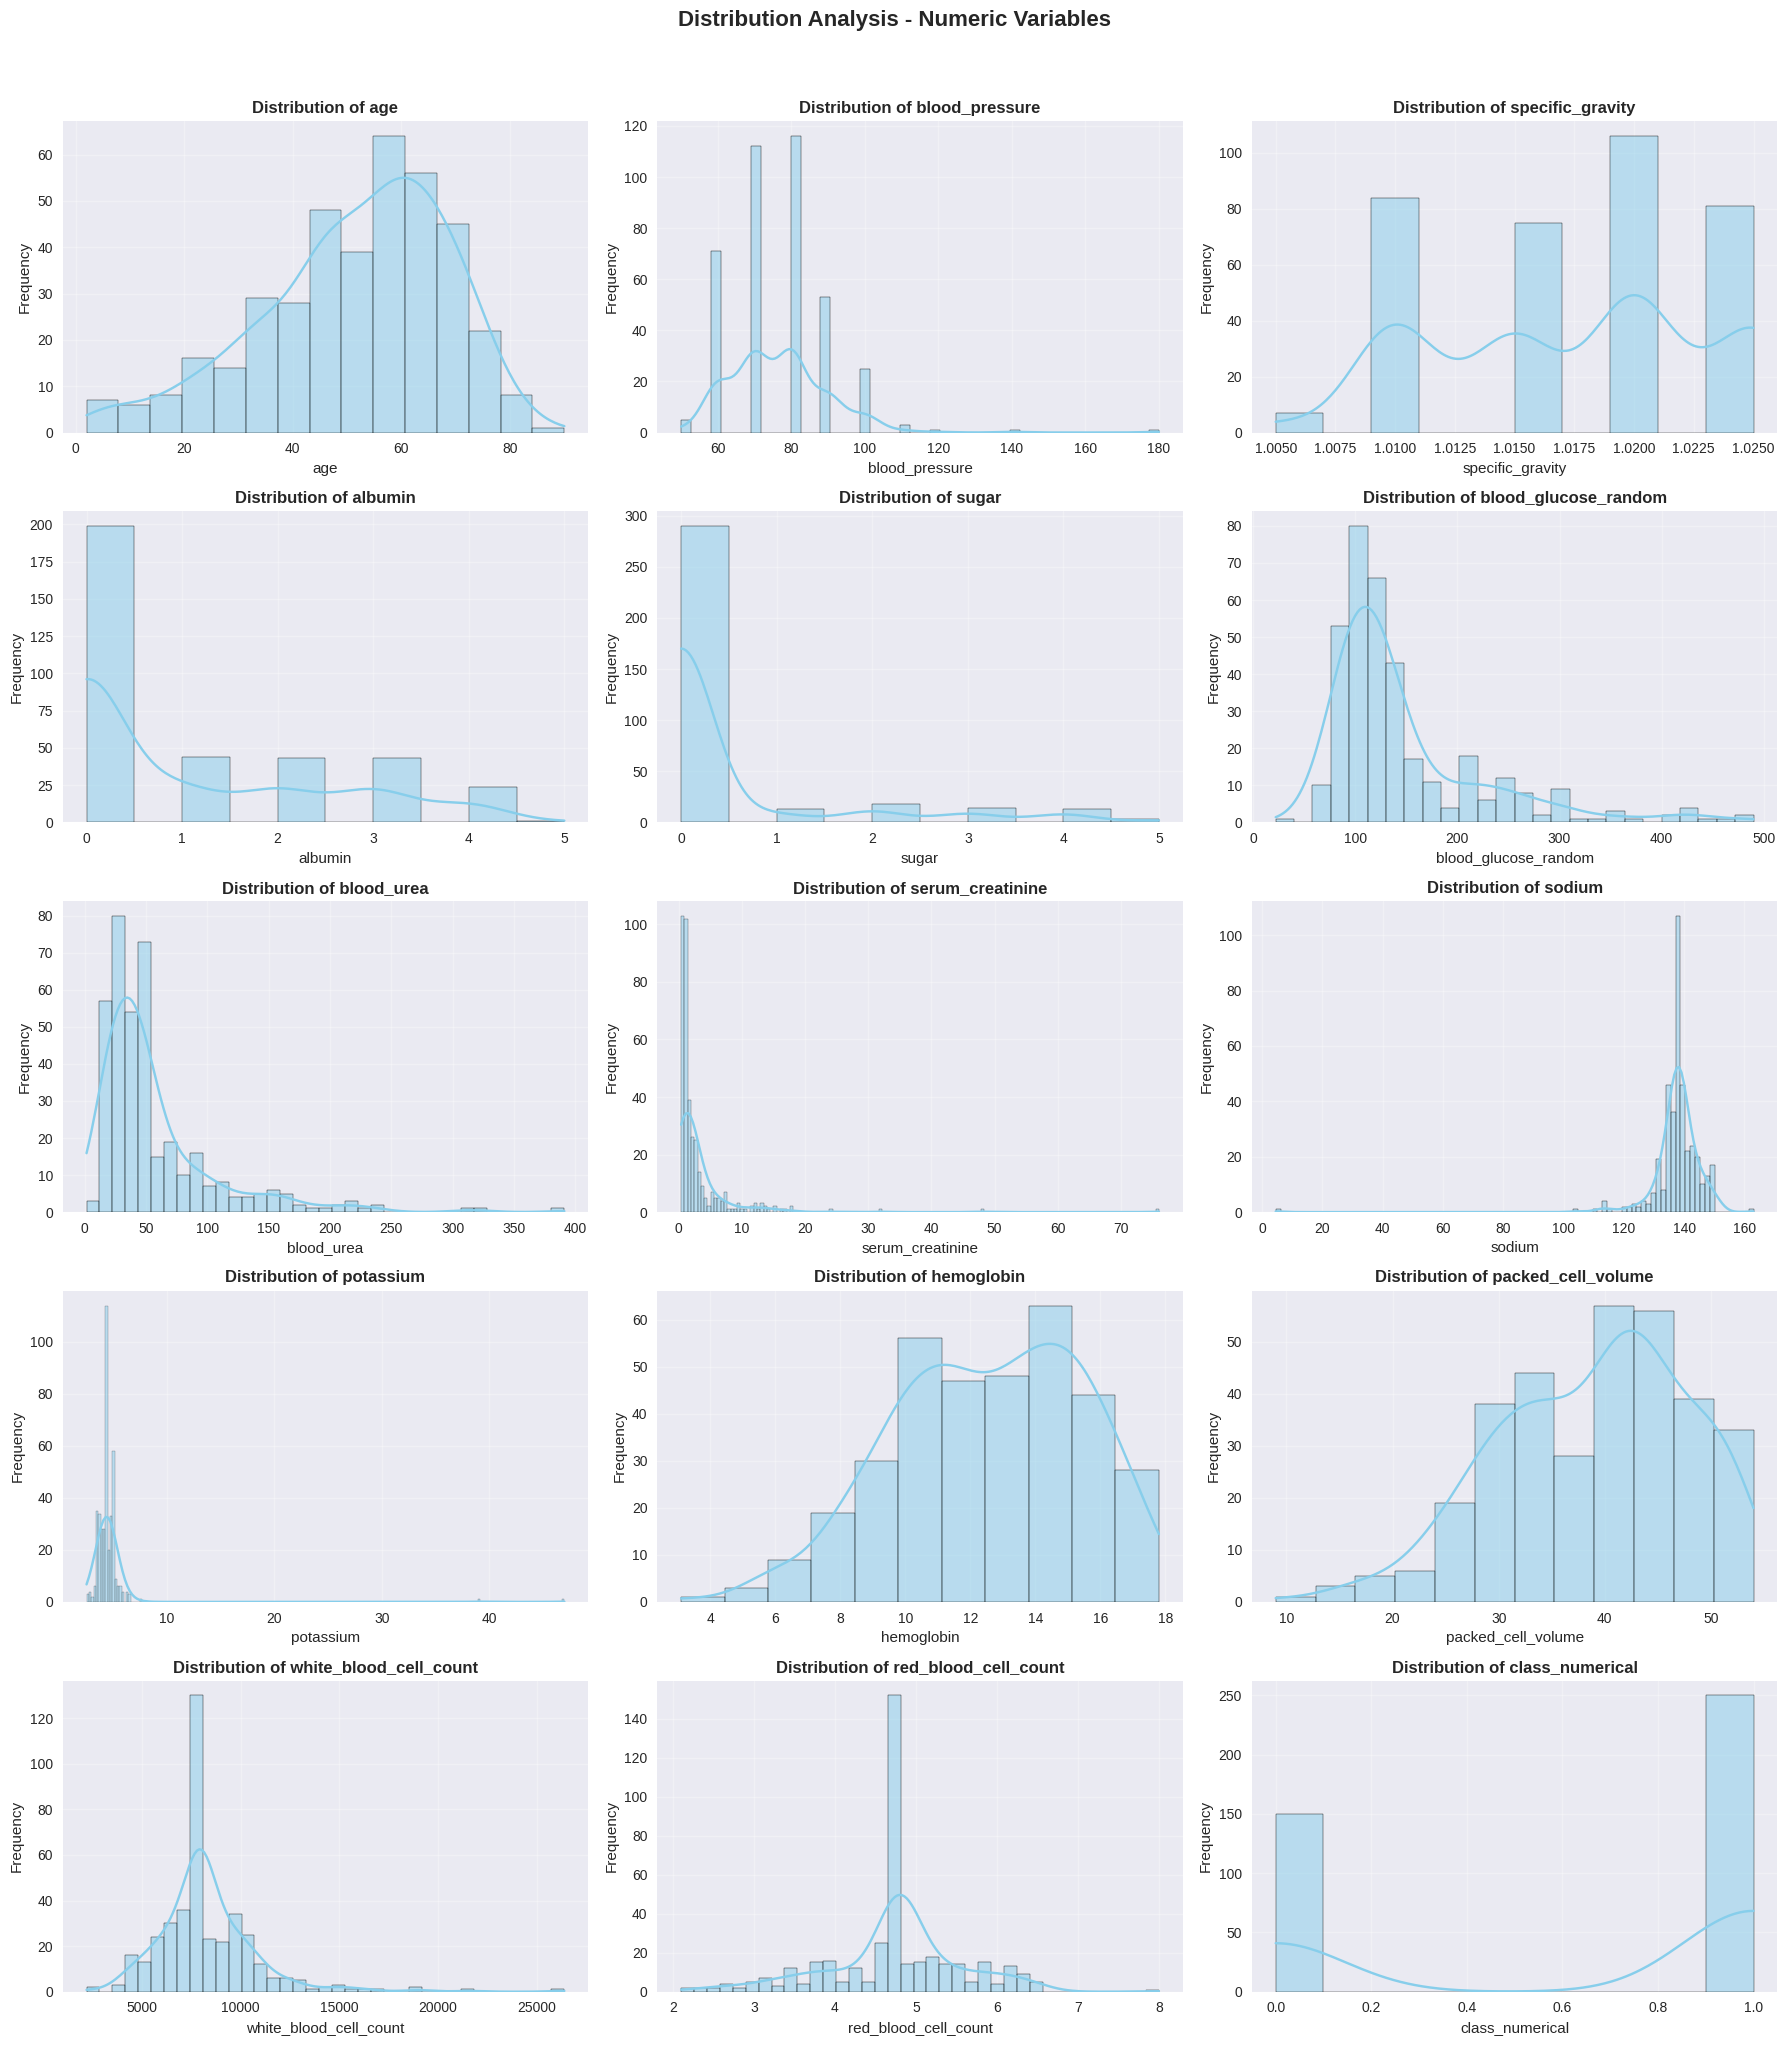

In [269]:
# Distribution analysis for numeric variables
# Re-classify numeric columns in case the DataFrame was modified
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if numeric_cols:
    n_numeric_cols = len(numeric_cols)
    n_cols = 3  # Number of columns for subplots
    n_rows = (n_numeric_cols + n_cols - 1) // n_cols # Calculate number of rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(n_numeric_cols, len(axes)):
        axes[i].axis('off')

    plt.suptitle('Distribution Analysis - Numeric Variables', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

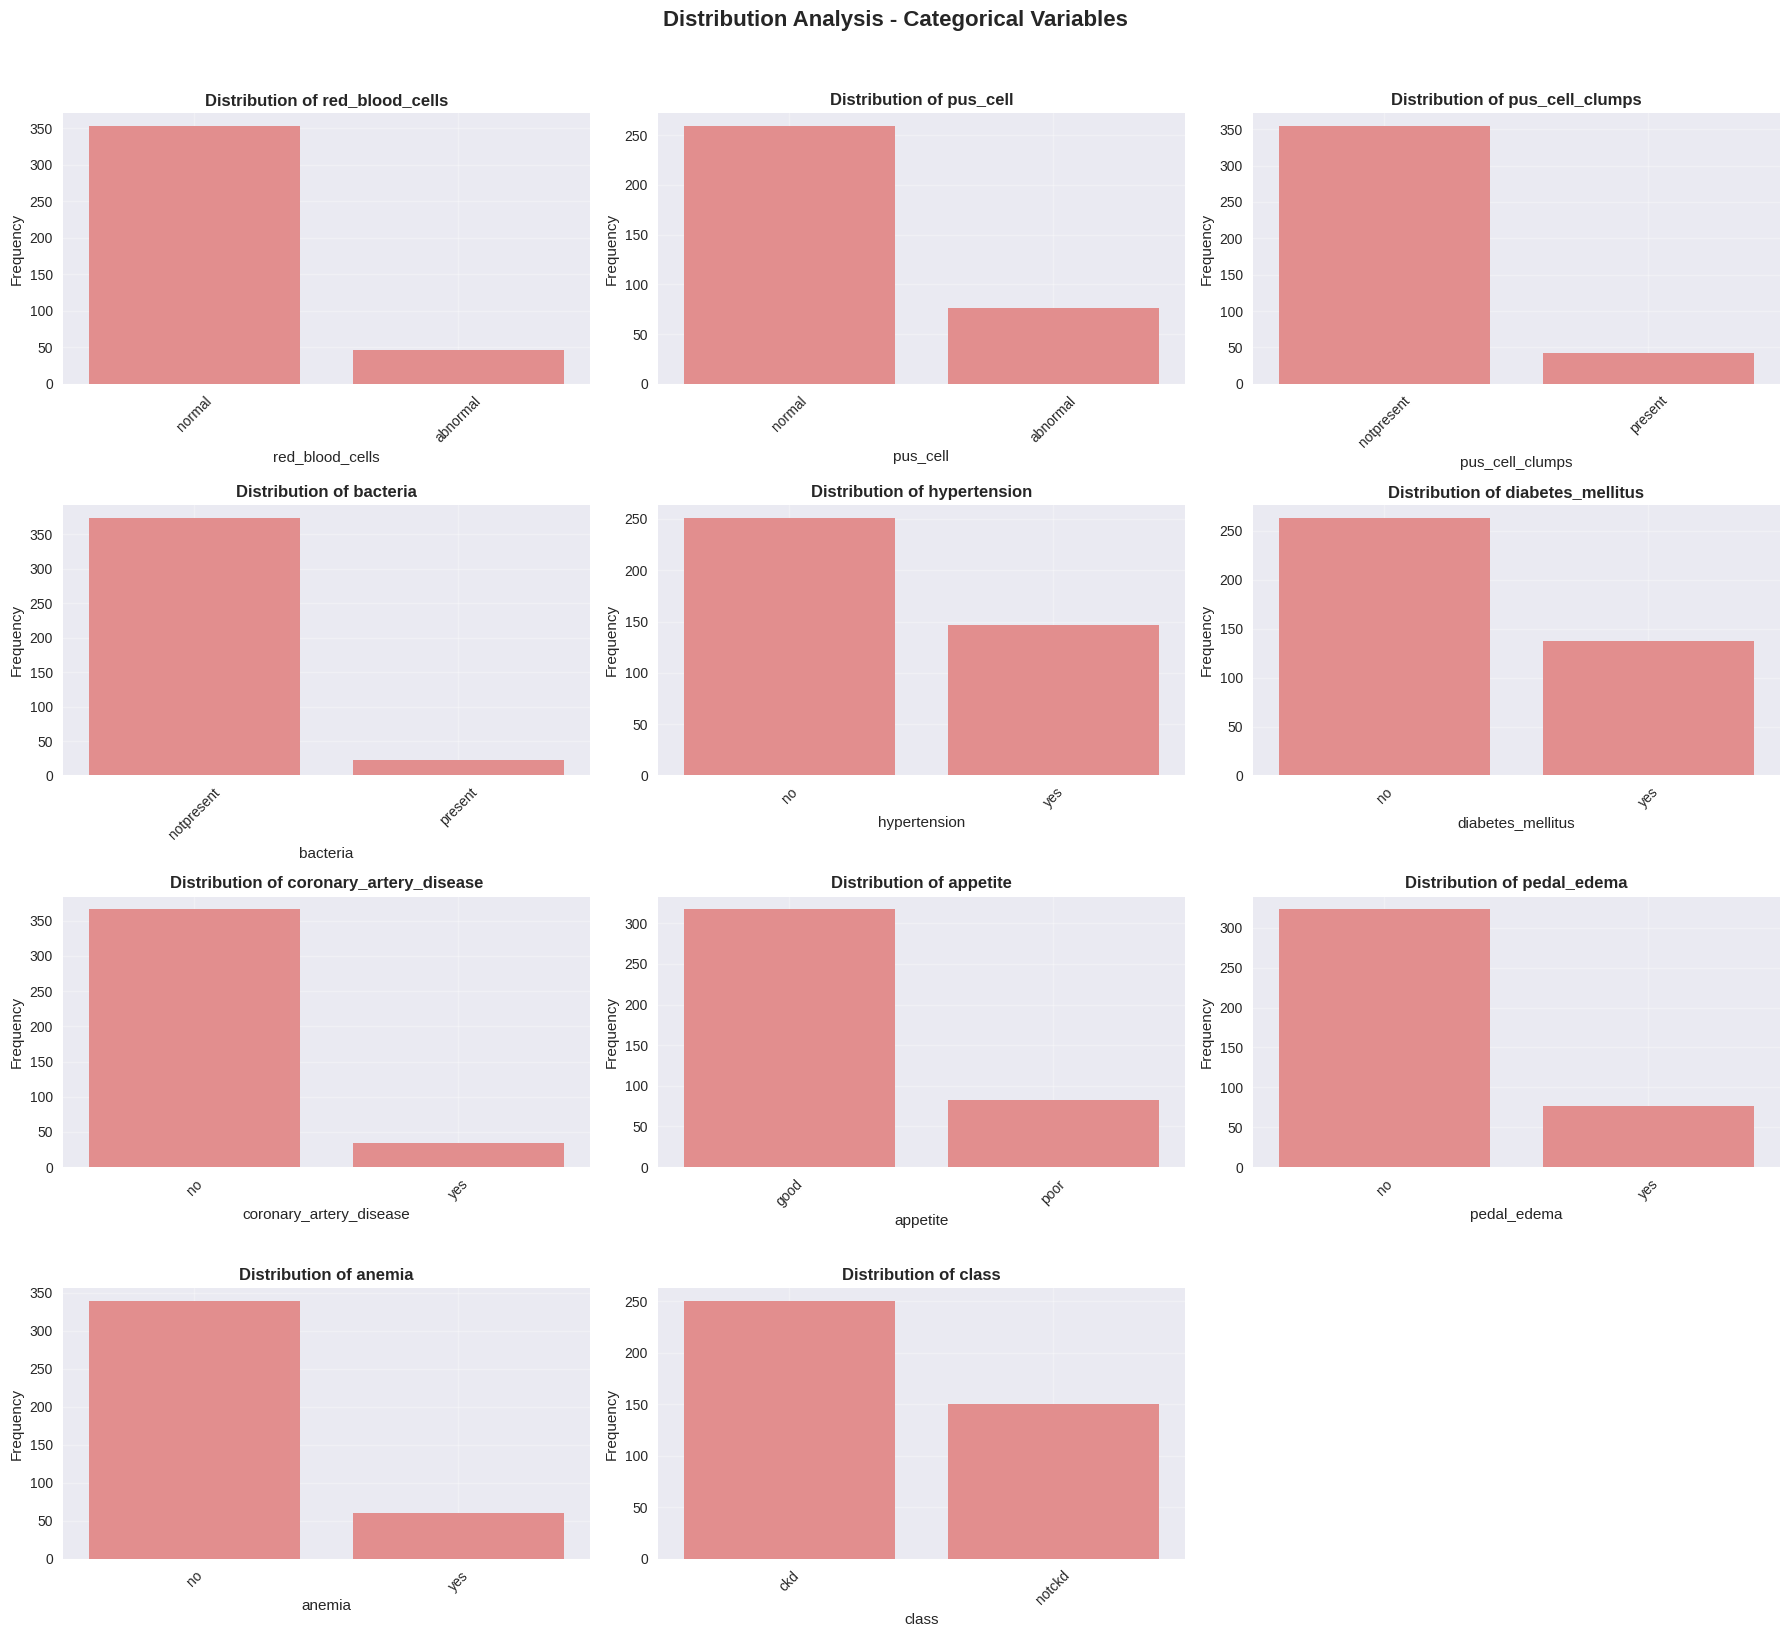

In [270]:
# Distribution analysis for categorical variables
if categorical_cols:
    n_categorical_cols = len(categorical_cols)
    n_cols = 3  # Number of columns for subplots
    n_rows = (n_categorical_cols + n_cols - 1) // n_cols # Calculate number of rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        # Get value counts and sort them for better visualization
        category_counts = df[col].value_counts().sort_values(ascending=False)
        sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[i], color='lightcoral')
        axes[i].set_title(f'Distribution of {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45) # Rotate labels for readability
        axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(n_categorical_cols, len(axes)):
        axes[i].axis('off')

    plt.suptitle('Distribution Analysis - Categorical Variables', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

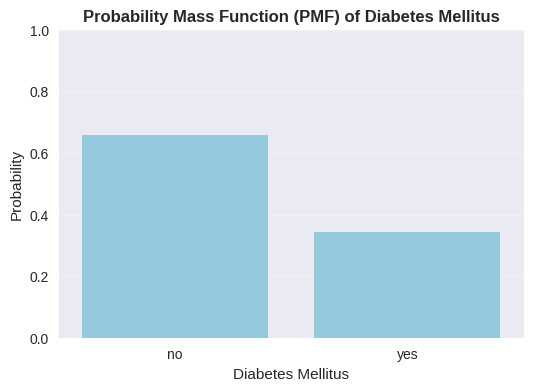

Probability Mass Function (PMF) values for 'diabetes_mellitus':
diabetes_mellitus
no     0.6575
yes    0.3425
Name: proportion, dtype: float64


In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the PMF for 'diabetes_mellitus'
pmf_diabetes = df['diabetes_mellitus'].value_counts(normalize=True).sort_index()

# Create a bar plot for the PMF
plt.figure(figsize=(6, 4))
sns.barplot(x=pmf_diabetes.index, y=pmf_diabetes.values, color='skyblue')
plt.title('Probability Mass Function (PMF) of Diabetes Mellitus', fontweight='bold')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Probability')
plt.ylim(0, 1) # Ensure y-axis is between 0 and 1 for probability
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Probability Mass Function (PMF) values for 'diabetes_mellitus':")
print(pmf_diabetes)

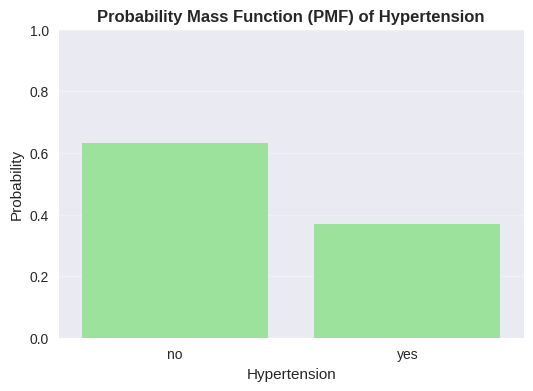

Probability Mass Function (PMF) values for 'hypertension':
hypertension
no     0.630653
yes    0.369347
Name: proportion, dtype: float64


In [272]:
# Calculate the PMF for 'hypertension'
pmf_hypertension = df['hypertension'].value_counts(normalize=True).sort_index()

# Create a bar plot for the PMF
plt.figure(figsize=(6, 4))
sns.barplot(x=pmf_hypertension.index, y=pmf_hypertension.values, color='lightgreen')
plt.title('Probability Mass Function (PMF) of Hypertension', fontweight='bold')
plt.xlabel('Hypertension')
plt.ylabel('Probability')
plt.ylim(0, 1) # Ensure y-axis is between 0 and 1 for probability
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Probability Mass Function (PMF) values for 'hypertension':")
print(pmf_hypertension)

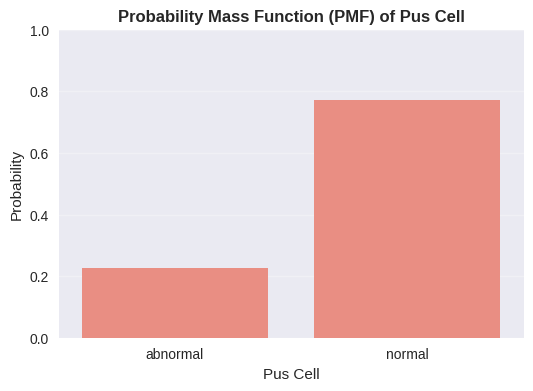

Probability Mass Function (PMF) values for 'pus_cell':
pus_cell
abnormal    0.226866
normal      0.773134
Name: proportion, dtype: float64


In [273]:
# Calculate the PMF for 'pus_cell'
pmf_pus_cell = df['pus_cell'].value_counts(normalize=True).sort_index()

# Create a bar plot for the PMF
plt.figure(figsize=(6, 4))
sns.barplot(x=pmf_pus_cell.index, y=pmf_pus_cell.values, color='salmon')
plt.title('Probability Mass Function (PMF) of Pus Cell', fontweight='bold')
plt.xlabel('Pus Cell')
plt.ylabel('Probability')
plt.ylim(0, 1) # Ensure y-axis is between 0 and 1 for probability
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Probability Mass Function (PMF) values for 'pus_cell':")
print(pmf_pus_cell)

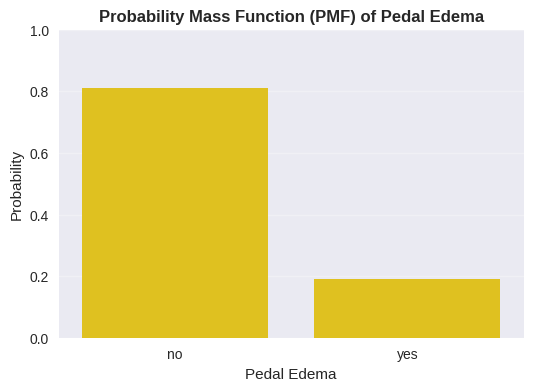

Probability Mass Function (PMF) values for 'pedal_edema':
pedal_edema
no     0.809524
yes    0.190476
Name: proportion, dtype: float64


In [274]:
# Calculate the PMF for 'pedal_edema'
pmf_pedal_edema = df['pedal_edema'].value_counts(normalize=True).sort_index()

# Create a bar plot for the PMF
plt.figure(figsize=(6, 4))
sns.barplot(x=pmf_pedal_edema.index, y=pmf_pedal_edema.values, color='gold')
plt.title('Probability Mass Function (PMF) of Pedal Edema', fontweight='bold')
plt.xlabel('Pedal Edema')
plt.ylabel('Probability')
plt.ylim(0, 1) # Ensure y-axis is between 0 and 1 for probability
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Probability Mass Function (PMF) values for 'pedal_edema':")
print(pmf_pedal_edema)

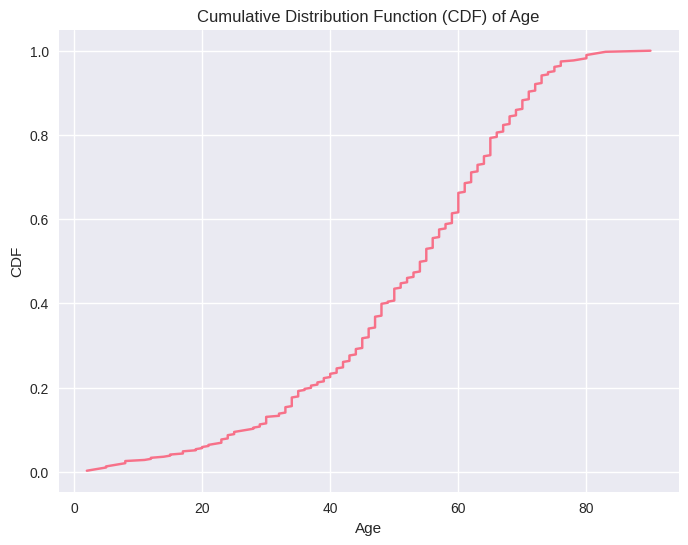

The probability that age is greater than 25 is: 0.9054


In [275]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values from the 'age' column before calculating CDF
age_data = df['age'].dropna()

# Calculate the CDF
sorted_age = np.sort(age_data)
cdf = np.arange(1, len(sorted_age) + 1) / len(sorted_age)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_age, cdf)
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Age')
plt.grid(True)
plt.show()

# Calculate P(Age > 25)
# P(Age > 25) = 1 - P(Age <= 25)
# Find the index of the value closest to 25 in the sorted data
index_at_25 = np.searchsorted(sorted_age, 25, side='right')
probability_le_25 = cdf[index_at_25 - 1] if index_at_25 > 0 else 0
probability_gt_25 = 1 - probability_le_25

print(f"The probability that age is greater than 25 is: {probability_gt_25:.4f}")

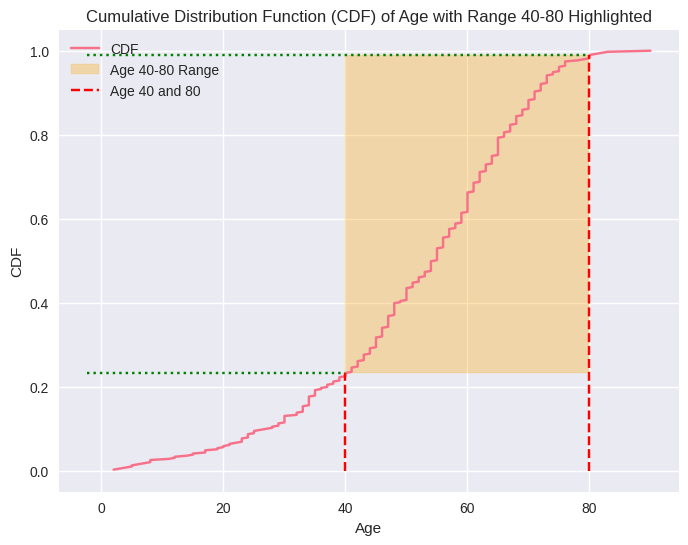

The probability that age is between 40 and 80 is: 0.7570


In [276]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values from the 'age' column before calculating CDF
age_data = df['age'].dropna()

# Calculate the CDF
sorted_age = np.sort(age_data)
cdf = np.arange(1, len(sorted_age) + 1) / len(sorted_age)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_age, cdf, label='CDF')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Age with Range 40-80 Highlighted')
plt.grid(True)

# Find the CDF values at age 40 and 80
cdf_at_40 = np.interp(40, sorted_age, cdf)
cdf_at_80 = np.interp(80, sorted_age, cdf)

# Highlight the range between 40 and 80 on the plot
plt.fill_betweenx([cdf_at_40, cdf_at_80], 40, 80, color='orange', alpha=0.3, label='Age 40-80 Range')
plt.vlines([40, 80], 0, [cdf_at_40, cdf_at_80], color='red', linestyle='dashed', label='Age 40 and 80')
plt.hlines([cdf_at_40, cdf_at_80], plt.xlim()[0], [40, 80], color='green', linestyle='dotted')


plt.legend()
plt.show()

# Calculate the probability P(40 < Age <= 80) = P(Age <= 80) - P(Age <= 40)
probability_between_40_and_80 = cdf_at_80 - cdf_at_40


print(f"The probability that age is between 40 and 80 is: {probability_between_40_and_80:.4f}")

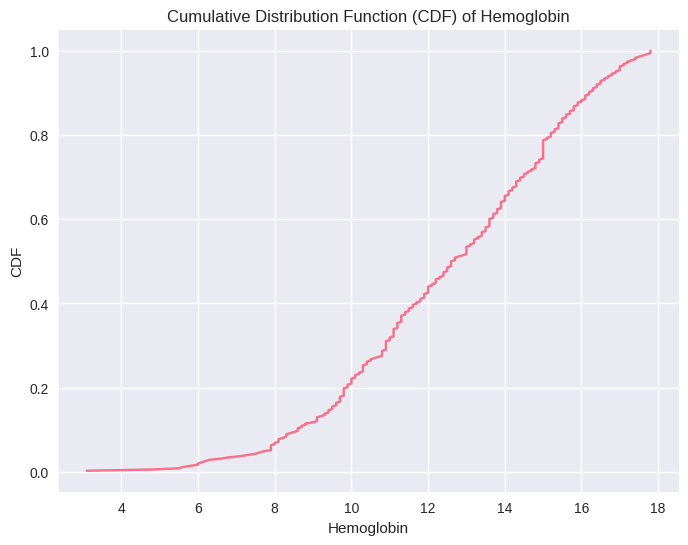

In [277]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values from the 'hemoglobin' column before calculating CDF
hemoglobin_data = df['hemoglobin'].dropna()

# Calculate the CDF
sorted_hemoglobin = np.sort(hemoglobin_data)
cdf_hemoglobin = np.arange(1, len(sorted_hemoglobin) + 1) / len(sorted_hemoglobin)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_hemoglobin, cdf_hemoglobin)
plt.xlabel('Hemoglobin')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Hemoglobin')
plt.grid(True)
plt.show()

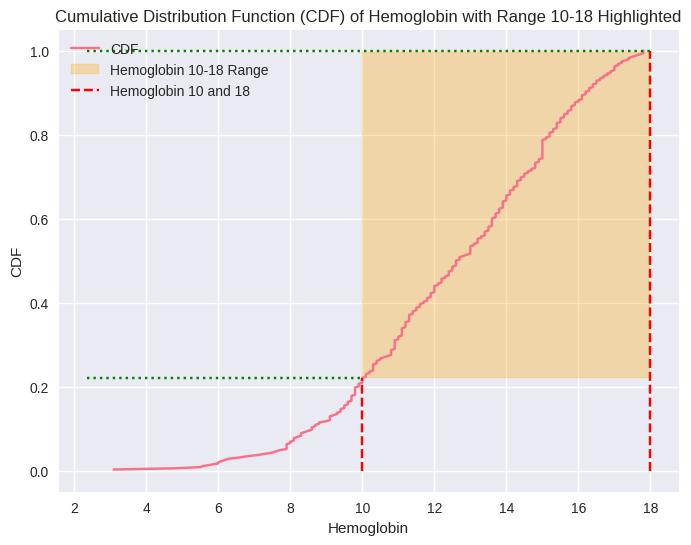

The probability that hemoglobin is between 10 and 18 is: 0.7787


In [278]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values from the 'hemoglobin' column before calculating CDF
hemoglobin_data = df['hemoglobin'].dropna()

# Calculate the CDF
sorted_hemoglobin = np.sort(hemoglobin_data)
cdf_hemoglobin = np.arange(1, len(sorted_hemoglobin) + 1) / len(sorted_hemoglobin)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_hemoglobin, cdf_hemoglobin, label='CDF')
plt.xlabel('Hemoglobin')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Hemoglobin with Range 10-18 Highlighted')
plt.grid(True)

# Find the CDF values at hemoglobin 10 and 18
cdf_at_10 = np.interp(10, sorted_hemoglobin, cdf_hemoglobin)
cdf_at_18 = np.interp(18, sorted_hemoglobin, cdf_hemoglobin)

# Highlight the range between 10 and 18 on the plot
plt.fill_betweenx([cdf_at_10, cdf_at_18], 10, 18, color='orange', alpha=0.3, label='Hemoglobin 10-18 Range')
plt.vlines([10, 18], 0, [cdf_at_10, cdf_at_18], color='red', linestyle='dashed', label='Hemoglobin 10 and 18')
plt.hlines([cdf_at_10, cdf_at_18], plt.xlim()[0], [10, 18], color='green', linestyle='dotted')

plt.legend()
plt.show()

# Calculate the probability P(10 < Hemoglobin <= 18) = P(Hemoglobin <= 18) - P(Hemoglobin <= 10)
probability_between_10_and_18 = cdf_at_18 - cdf_at_10

print(f"The probability that hemoglobin is between 10 and 18 is: {probability_between_10_and_18:.4f}")

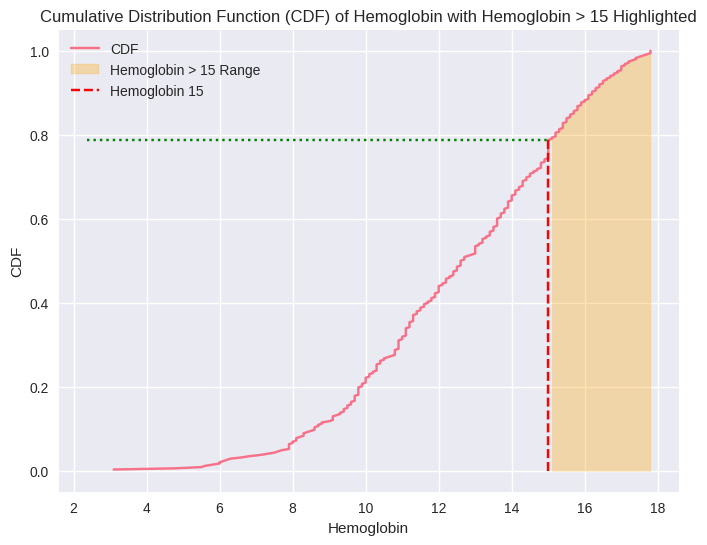

The probability that hemoglobin is greater than 15 is: 0.2126


In [279]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values from the 'hemoglobin' column before calculating CDF
hemoglobin_data = df['hemoglobin'].dropna()

# Calculate the CDF
sorted_hemoglobin = np.sort(hemoglobin_data)
cdf_hemoglobin = np.arange(1, len(sorted_hemoglobin) + 1) / len(sorted_hemoglobin)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_hemoglobin, cdf_hemoglobin, label='CDF')
plt.xlabel('Hemoglobin')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Hemoglobin with Hemoglobin > 15 Highlighted')
plt.grid(True)

# Find the CDF value at hemoglobin 15
cdf_at_15 = np.interp(15, sorted_hemoglobin, cdf_hemoglobin)


# Highlight the range greater than 15 on the plot
plt.fill_between(sorted_hemoglobin, cdf_hemoglobin, where=(sorted_hemoglobin > 15), color='orange', alpha=0.3, label='Hemoglobin > 15 Range')
plt.vlines(15, 0, cdf_at_15, color='red', linestyle='dashed', label='Hemoglobin 15')
plt.hlines(cdf_at_15, plt.xlim()[0], 15, color='green', linestyle='dotted')

plt.legend()
plt.show()


# Calculate P(Hemoglobin > 15) = 1 - P(Hemoglobin <= 15)
probability_gt_15 = 1 - cdf_at_15

print(f"The probability that hemoglobin is greater than 15 is: {probability_gt_15:.4f}")

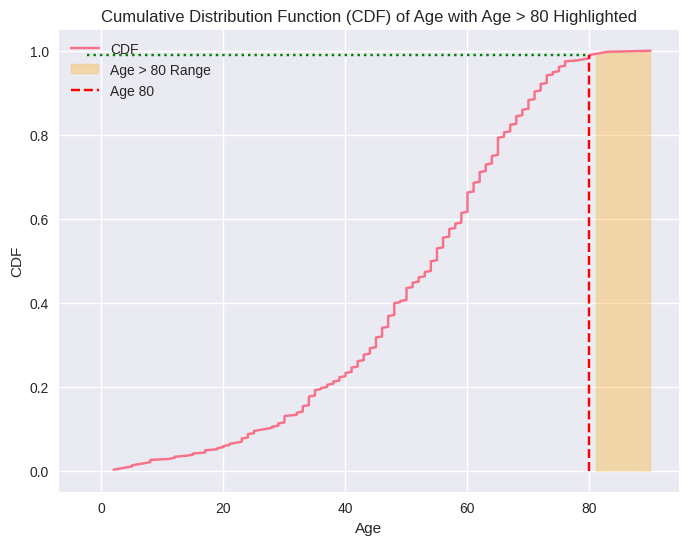

The probability that age is greater than 80 is: 0.0102


In [280]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values from the 'age' column before calculating CDF
age_data = df['age'].dropna()

# Calculate the CDF
sorted_age = np.sort(age_data)
cdf = np.arange(1, len(sorted_age) + 1) / len(sorted_age)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_age, cdf, label='CDF')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Age with Age > 80 Highlighted')
plt.grid(True)

# Find the CDF value at age 80
cdf_at_80 = np.interp(80, sorted_age, cdf)

# Highlight the range greater than 80 on the plot
plt.fill_between(sorted_age, cdf, where=(sorted_age > 80), color='orange', alpha=0.3, label='Age > 80 Range')
plt.vlines(80, 0, cdf_at_80, color='red', linestyle='dashed', label='Age 80')
plt.hlines(cdf_at_80, plt.xlim()[0], 80, color='green', linestyle='dotted')


plt.legend()
plt.show()

# Calculate P(Age > 80) = 1 - P(Age <= 80)
probability_gt_80 = 1 - cdf_at_80

print(f"The probability that age is greater than 80 is: {probability_gt_80:.4f}")

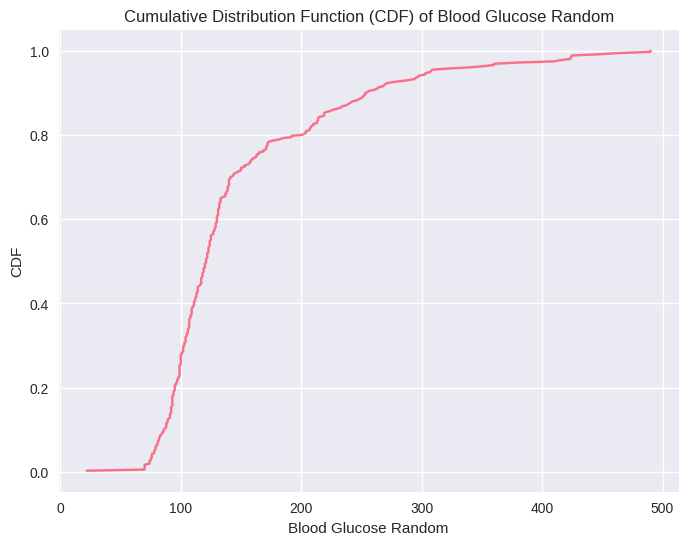

In [281]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values from the 'blood_glucose_random' column before calculating CDF
blood_glucose_random_data = df['blood_glucose_random'].dropna()

# Calculate the CDF
sorted_bgr = np.sort(blood_glucose_random_data)
cdf_bgr = np.arange(1, len(sorted_bgr) + 1) / len(sorted_bgr)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_bgr, cdf_bgr)
plt.xlabel('Blood Glucose Random')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Blood Glucose Random')
plt.grid(True)
plt.show()

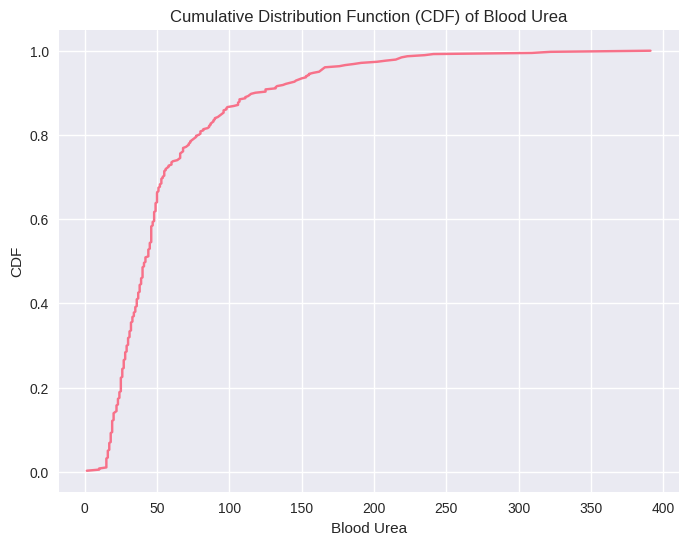

In [282]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values from the 'blood_urea' column before calculating CDF
blood_urea_data = df['blood_urea'].dropna()

# Calculate the CDF
sorted_bu = np.sort(blood_urea_data)
cdf_bu = np.arange(1, len(sorted_bu) + 1) / len(sorted_bu)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_bu, cdf_bu)
plt.xlabel('Blood Urea')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Blood Urea')
plt.grid(True)
plt.show()

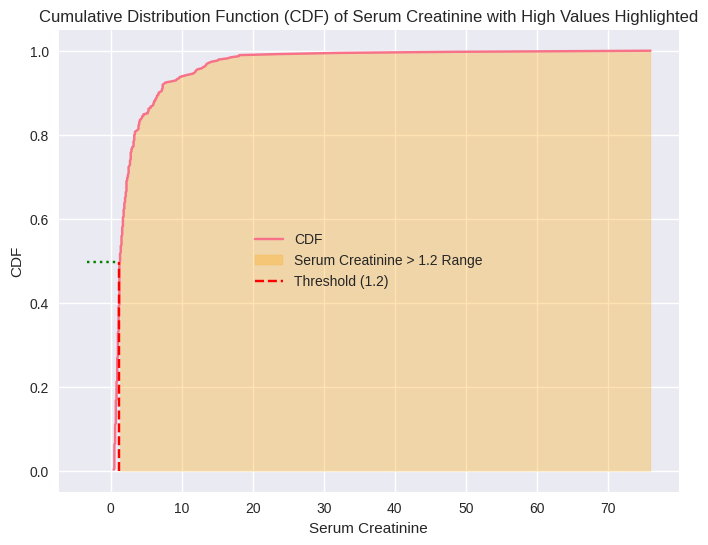

The probability that serum creatinine is greater than 1.2 is: 0.5039


In [283]:

# Drop NaN values from the 'serum_creatinine' column before calculating CDF
serum_creatinine_data = df['serum_creatinine'].dropna()

# Calculate the CDF
sorted_sc = np.sort(serum_creatinine_data)
cdf_sc = np.arange(1, len(sorted_sc) + 1) / len(sorted_sc)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_sc, cdf_sc, label='CDF')
plt.xlabel('Serum Creatinine')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Serum Creatinine with High Values Highlighted')
plt.grid(True)

# Let's consider a threshold for high serum creatinine, e.g., 1.2 mg/dL (a common upper limit for normal)
threshold = 1.2

# Find the CDF value at the threshold
cdf_at_threshold = np.interp(threshold, sorted_sc, cdf_sc)

# Highlight the range above the threshold on the plot
plt.fill_between(sorted_sc, cdf_sc, where=(sorted_sc > threshold), color='orange', alpha=0.3, label=f'Serum Creatinine > {threshold} Range')
plt.vlines(threshold, 0, cdf_at_threshold, color='red', linestyle='dashed', label=f'Threshold ({threshold})')
plt.hlines(cdf_at_threshold, plt.xlim()[0], threshold, color='green', linestyle='dotted')


plt.legend()
plt.show()


# Calculate P(Serum Creatinine > threshold) = 1 - P(Serum Creatinine <= threshold)
probability_gt_threshold = 1 - cdf_at_threshold

print(f"The probability that serum creatinine is greater than {threshold} is: {probability_gt_threshold:.4f}")

In [284]:
# Calculate Skewness and Kurtosis for numeric variables
if numeric_cols:
    skewness = df[numeric_cols].skew()
    kurtosis = df[numeric_cols].kurtosis()

    stats_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

    print("Skewness and Kurtosis for Numeric Variables:")
    display(stats_df.round(2))
else:
    print("No numeric columns found in the DataFrame.")

Skewness and Kurtosis for Numeric Variables:


,Skewness,Kurtosis
age,-0.67,0.06
blood_pressure,1.61,8.65
specific_gravity,-0.17,-1.14
albumin,1.00,-0.38
sugar,2.46,5.06
blood_glucose_random,2.01,4.23
blood_urea,2.63,9.35
serum_creatinine,7.51,79.30
sodium,-7.93,110.02
potassium,13.13,183.42


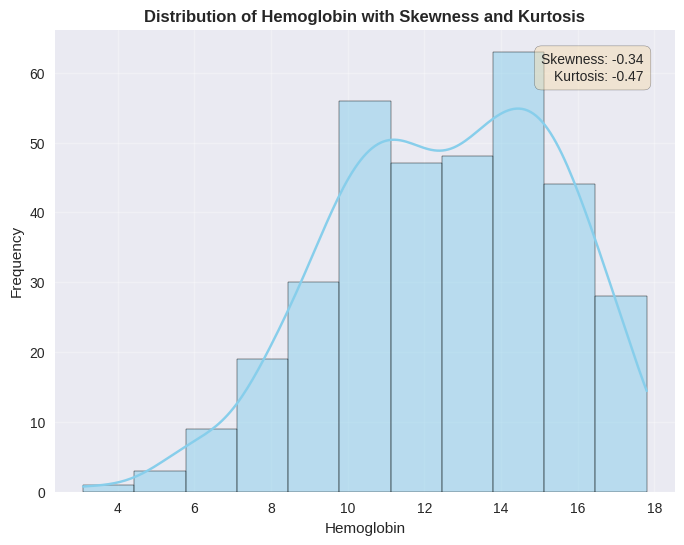

Skewness for Hemoglobin: -0.3351
Kurtosis for Hemoglobin: -0.4714


In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Skewness and Kurtosis for 'hemoglobin'
if 'hemoglobin' in df.columns:
    skewness_hemoglobin = df['hemoglobin'].skew()
    kurtosis_hemoglobin = df['hemoglobin'].kurtosis()

    # Plot the distribution of 'hemoglobin'
    plt.figure(figsize=(8, 6))
    sns.histplot(df['hemoglobin'].dropna(), kde=True, color='skyblue')
    plt.title('Distribution of Hemoglobin with Skewness and Kurtosis', fontweight='bold')
    plt.xlabel('Hemoglobin')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    # Add text annotations for Skewness and Kurtosis
    plt.text(0.95, 0.95, f'Skewness: {skewness_hemoglobin:.2f}\nKurtosis: {kurtosis_hemoglobin:.2f}',
             horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

    plt.show()

    print(f"Skewness for Hemoglobin: {skewness_hemoglobin:.4f}")
    print(f"Kurtosis for Hemoglobin: {kurtosis_hemoglobin:.4f}")

else:
    print("'hemoglobin' column not found in the DataFrame.")

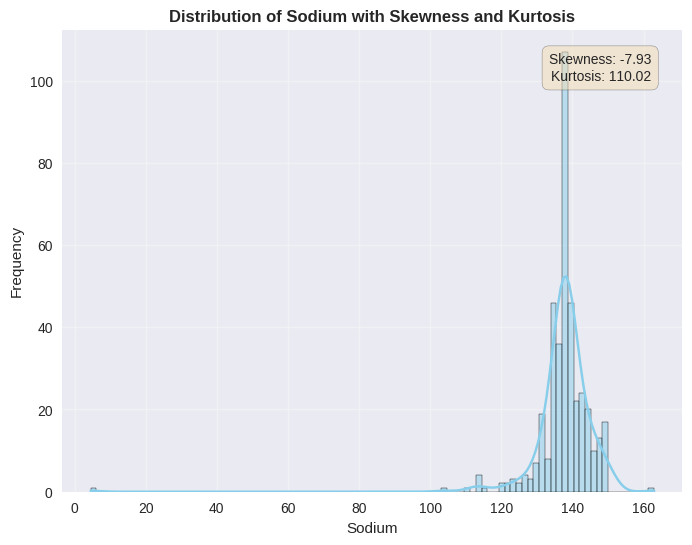

Skewness for Sodium: -7.9293
Kurtosis for Sodium: 110.0175


In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Skewness and Kurtosis for 'sodium'
if 'sodium' in df.columns:
    skewness_sodium = df['sodium'].skew()
    kurtosis_sodium = df['sodium'].kurtosis()

    # Plot the distribution of 'sodium'
    plt.figure(figsize=(8, 6))
    sns.histplot(df['sodium'].dropna(), kde=True, color='skyblue')
    plt.title('Distribution of Sodium with Skewness and Kurtosis', fontweight='bold')
    plt.xlabel('Sodium')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    # Add text annotations for Skewness and Kurtosis
    plt.text(0.95, 0.95, f'Skewness: {skewness_sodium:.2f}\nKurtosis: {kurtosis_sodium:.2f}',
             horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

    plt.show()

    print(f"Skewness for Sodium: {skewness_sodium:.4f}")
    print(f"Kurtosis for Sodium: {kurtosis_sodium:.4f}")

else:
    print("'sodium' column not found in the DataFrame.")

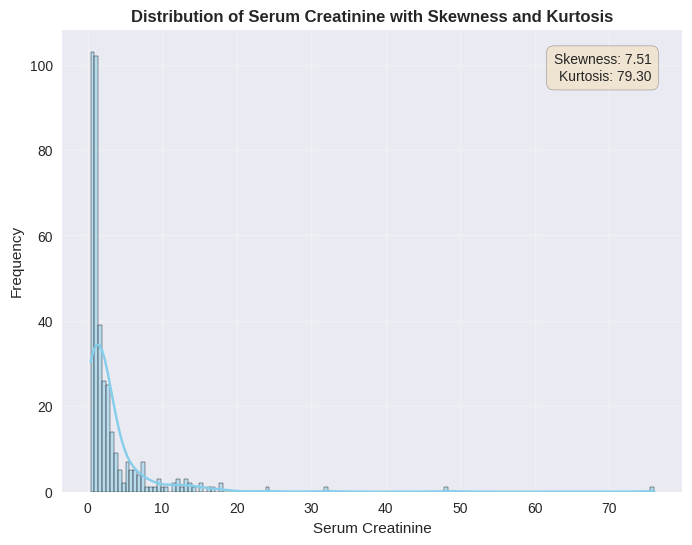

Skewness for Serum Creatinine: 7.5095
Kurtosis for Serum Creatinine: 79.3043


In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Skewness and Kurtosis for 'serum_creatinine'
if 'serum_creatinine' in df.columns:
    skewness_sc = df['serum_creatinine'].skew()
    kurtosis_sc = df['serum_creatinine'].kurtosis()

    # Plot the distribution of 'serum_creatinine'
    plt.figure(figsize=(8, 6))
    sns.histplot(df['serum_creatinine'].dropna(), kde=True, color='skyblue')
    plt.title('Distribution of Serum Creatinine with Skewness and Kurtosis', fontweight='bold')
    plt.xlabel('Serum Creatinine')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    # Add text annotations for Skewness and Kurtosis
    plt.text(0.95, 0.95, f'Skewness: {skewness_sc:.2f}\nKurtosis: {kurtosis_sc:.2f}',
             horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

    plt.show()

    print(f"Skewness for Serum Creatinine: {skewness_sc:.4f}")
    print(f"Kurtosis for Serum Creatinine: {kurtosis_sc:.4f}")

else:
    print("'serum_creatinine' column not found in the DataFrame.")

In [288]:
# Quantile Analysis for Serum Creatinine
if 'serum_creatinine' in df.columns:
    print("Quantile Analysis for Serum Creatinine:")
    display(df['serum_creatinine'].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
else:
    print("'serum_creatinine' column not found in the DataFrame.")

Quantile Analysis for Serum Creatinine:


,serum_creatinine
0.01,0.500
0.05,0.500
0.10,0.600
0.25,0.900
0.50,1.300
0.75,2.800
0.90,6.780
0.95,11.890
0.99,19.162


In [289]:
# Quantile Analysis for Age
if 'age' in df.columns:
    print("Quantile Analysis for Age:")
    display(df['age'].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
else:
    print("'age' column not found in the DataFrame.")

Quantile Analysis for Age:


,age
0.01,5.0
0.05,19.0
0.10,28.0
0.25,42.0
0.50,55.0
0.75,64.5
0.90,71.0
0.95,74.5
0.99,80.1


In [290]:
# Quantile Analysis for Hemoglobin
if 'hemoglobin' in df.columns:
    print("Quantile Analysis for Hemoglobin:")
    display(df['hemoglobin'].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
else:
    print("'hemoglobin' column not found in the DataFrame.")

Quantile Analysis for Hemoglobin:


,hemoglobin
0.01,5.694
0.05,7.900
0.10,8.600
0.25,10.300
0.50,12.650
0.75,15.000
0.90,16.200
0.95,16.900
0.99,17.653


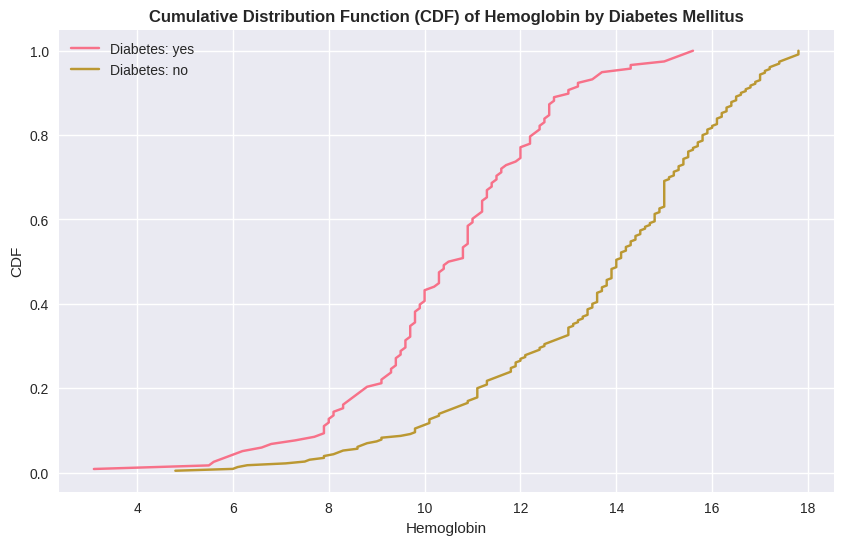

In [295]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in 'diabetes_mellitus'
diabetes_values = df['diabetes_mellitus'].unique()

# Iterate through each diabetes value and plot the CDF of hemoglobin
plt.figure(figsize=(10, 6))

for diabetes_val in diabetes_values:
    # Filter data for the current diabetes value and drop NaN values from 'hemoglobin'
    hemoglobin_data_diabetes = df[df['diabetes_mellitus'] == diabetes_val]['hemoglobin'].dropna()

    if not hemoglobin_data_diabetes.empty:
        # Calculate the CDF
        sorted_hemoglobin = np.sort(hemoglobin_data_diabetes)
        cdf_hemoglobin = np.arange(1, len(sorted_hemoglobin) + 1) / len(sorted_hemoglobin)

        # Plot the CDF
        plt.plot(sorted_hemoglobin, cdf_hemoglobin, label=f'Diabetes: {diabetes_val}')

    else:
        print(f"No non-null hemoglobin data found for diabetes value: {diabetes_val}")

plt.xlabel('Hemoglobin')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Hemoglobin by Diabetes Mellitus', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

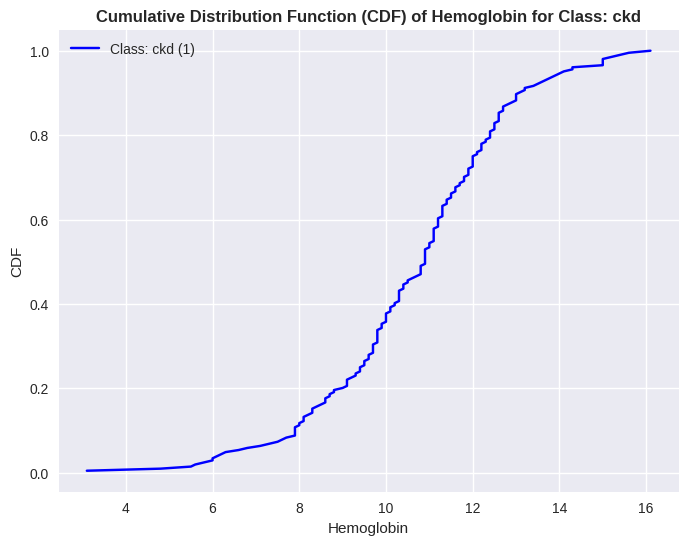

In [296]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data for class_numerical == 1 (ckd) and drop NaN values from 'hemoglobin'
hemoglobin_data_ckd = df[df['class_numerical'] == 1]['hemoglobin'].dropna()

if not hemoglobin_data_ckd.empty:
    # Calculate the CDF
    sorted_hemoglobin_ckd = np.sort(hemoglobin_data_ckd)
    cdf_hemoglobin_ckd = np.arange(1, len(sorted_hemoglobin_ckd) + 1) / len(sorted_hemoglobin_ckd)

    # Plot the CDF
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_hemoglobin_ckd, cdf_hemoglobin_ckd, label='Class: ckd (1)', color='blue')

    plt.xlabel('Hemoglobin')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function (CDF) of Hemoglobin for Class: ckd', fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("No non-null hemoglobin data found for class: ckd (1)")

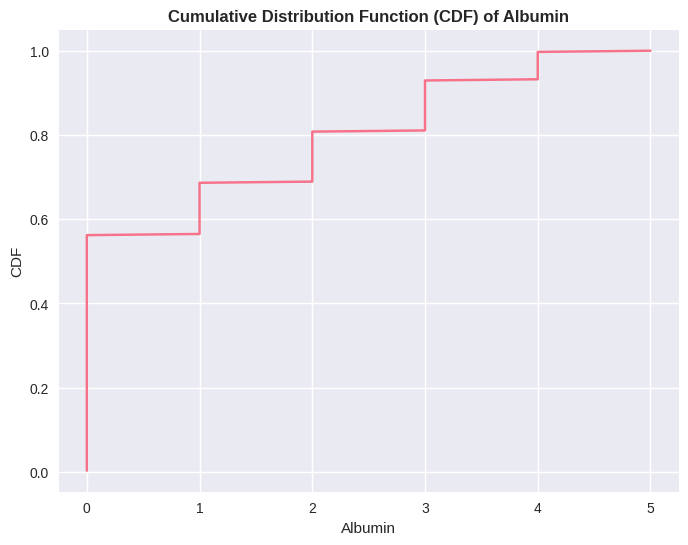

In [299]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values from the 'albumin' column before calculating CDF
albumin_data = df['albumin'].dropna()

if not albumin_data.empty:
    # Calculate the CDF
    sorted_albumin = np.sort(albumin_data)
    cdf_albumin = np.arange(1, len(sorted_albumin) + 1) / len(sorted_albumin)

    # Plot the CDF
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_albumin, cdf_albumin)
    plt.xlabel('Albumin')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function (CDF) of Albumin', fontweight='bold')
    plt.grid(True)
    plt.show()
else:
    print("No non-null albumin data found to plot CDF.")

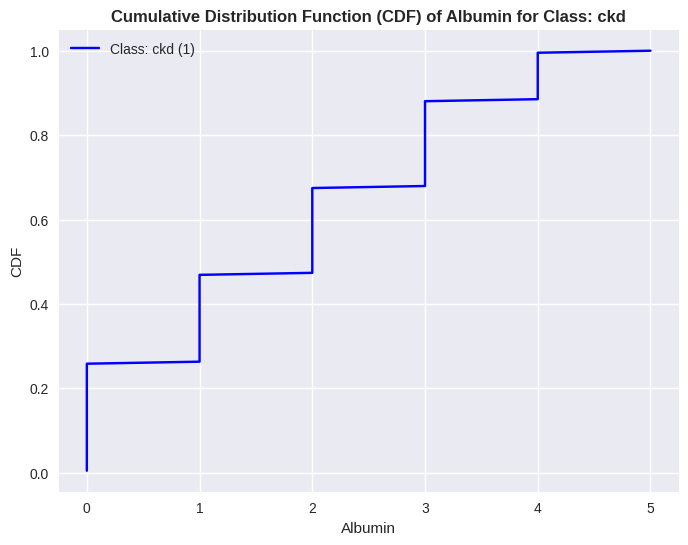

In [300]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data for class_numerical == 1 (ckd) and drop NaN values from 'albumin'
albumin_data_ckd = df[df['class_numerical'] == 1]['albumin'].dropna()

if not albumin_data_ckd.empty:
    # Calculate the CDF
    sorted_albumin_ckd = np.sort(albumin_data_ckd)
    cdf_albumin_ckd = np.arange(1, len(sorted_albumin_ckd) + 1) / len(sorted_albumin_ckd)

    # Plot the CDF
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_albumin_ckd, cdf_albumin_ckd, label='Class: ckd (1)', color='blue')

    plt.xlabel('Albumin')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function (CDF) of Albumin for Class: ckd', fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("No non-null albumin data found for class: ckd (1)")

### Key Observations from Univariate Analysis

Based on the comprehensive univariate analysis performed on the dataset, the following key observations have been made regarding the individual characteristics and distributions of the variables:

*   **Data Quality:**
    *   Several columns exhibit a significant percentage of missing values, notably 'red_blood_cells', 'red_blood_cell_count', 'white_blood_cell_count', 'potassium', and 'sodium'. Missing values in columns with >20% missing data were imputed using the median for numerical variables and the mode for categorical variables.
    *   Inconsistent values containing extra whitespace or hidden characters were identified and cleaned in 'diabetes_mellitus', 'coronary_artery_disease', and 'class' columns to ensure data consistency.
    *   No duplicate rows were found in the dataset.
    *   The 'id' column was dropped as it is not relevant for the analysis.

*   **Numerical Variable Distributions and Statistics:**
    *   **Age:** The distribution of age appears somewhat left-skewed (Skewness: -0.67), with a majority of individuals in the middle to older age ranges. The CDF analysis indicated that approximately 75.70% of individuals are between 40 and 80 years old, while only about 1.02% are older than 80.
    *   **Blood Pressure, Blood Glucose Random, Blood Urea, Serum Creatinine, Sodium, Potassium, White Blood Cell Count:** These variables show varying degrees of positive skewness and high kurtosis, suggesting the presence of outliers and potentially heavy tails in their distributions. This was further supported by the outlier analysis summary.
    *   **Specific Gravity, Albumin, Sugar, Hemoglobin, Packed Cell Volume, Red Blood Cell Count:** These variables show distributions that are less skewed compared to the previously mentioned variables, although some still exhibit a degree of skewness and kurtosis.
    *   **Hemoglobin Distribution by Class:** The log-normal model fitting for hemoglobin, separated by class, suggests that the distribution of hemoglobin levels differs between the 'ckd' and 'notckd' groups. The fitted parameters for the log-normal distribution (derived from the normal fit on log-transformed data) indicate distinct characteristics for hemoglobin levels in patients with and without Chronic Kidney Disease.

*   **Categorical Variable Distributions:**
    *   The Probability Mass Functions (PMFs) for categorical variables like 'diabetes_mellitus', 'hypertension', 'pus_cell', 'pedal_edema', and 'class' revealed the proportion of observations within each category. For instance, the PMF for 'class' shows the distribution between 'ckd' and 'notckd' cases in the dataset.

*   **Quantile Analysis:**
    *   Quantile analysis for 'serum_creatinine', 'age', and 'hemoglobin' provided a detailed view of their spread. For example, the high quantiles for 'serum_creatinine' confirmed the presence of extreme values, which aligns with its high skewness and kurtosis.

*   **Outlier Detection (Preliminary):**
    *   The box plots and quantitative outlier analysis (using the IQR method) highlighted the presence of outliers in several numerical columns, particularly in variables exhibiting high skewness and kurtosis.

In summary, the univariate analysis has provided critical insights into the data's structure, quality issues (missing values, inconsistencies), the distributions of individual variables, the presence of outliers, and preliminary indications of how some key numerical variables like hemoglobin might differ across different patient classes. These findings are essential for informing subsequent data preprocessing steps and multivariate analyses.

## 5. Multivariate Analysis

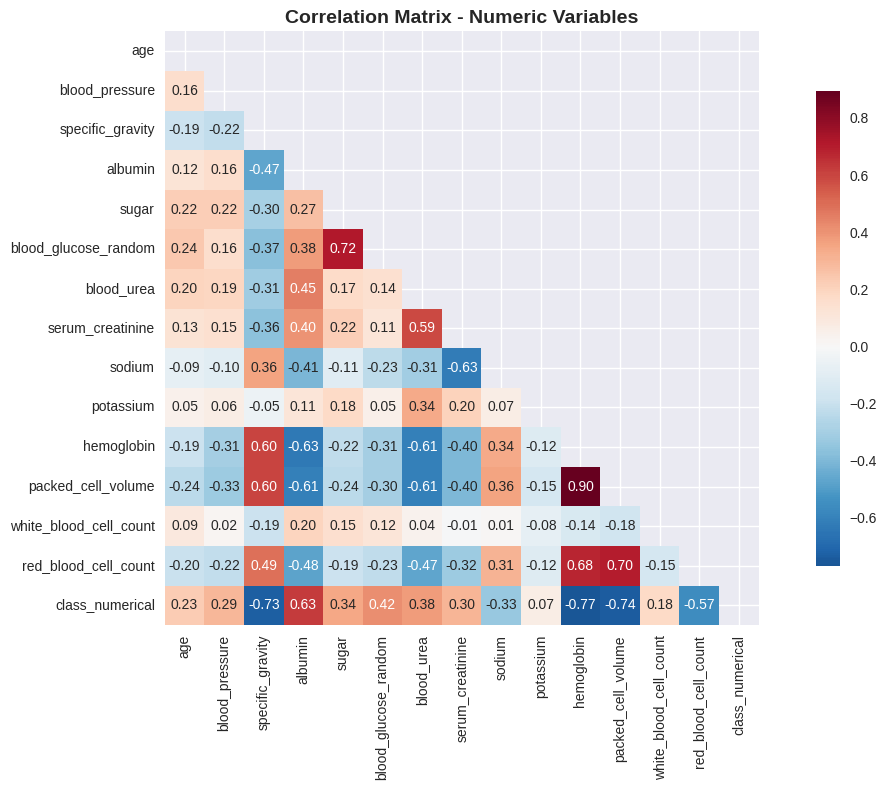

Strong Correlations (|r| > 0.7):
  • specific_gravity ↔ class_numerical: -0.732
  • sugar ↔ blood_glucose_random: 0.718
  • hemoglobin ↔ packed_cell_volume: 0.895
  • hemoglobin ↔ class_numerical: -0.769
  • packed_cell_volume ↔ red_blood_cell_count: 0.703
  • packed_cell_volume ↔ class_numerical: -0.741


In [298]:
# Correlation analysis for numeric variables
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()

    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r',
                center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix - Numeric Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Identify strong correlations
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_correlations.append((correlation_matrix.columns[i],
                                          correlation_matrix.columns[j], corr_val))

    if strong_correlations:
        print("Strong Correlations (|r| > 0.7):")
        for var1, var2, corr in strong_correlations:
            print(f"  • {var1} ↔ {var2}: {corr:.3f}")
    else:
        print("No strong correlations (|r| > 0.7) detected.")

In [301]:
# Identify strong correlations with 'class_numerical'
strong_correlations_with_class = []
if 'class_numerical' in correlation_matrix.columns:
    for col, corr_val in correlation_matrix['class_numerical'].items():
        if col != 'class_numerical' and abs(corr_val) > 0.7:
            strong_correlations_with_class.append((col, corr_val))

if strong_correlations_with_class:
    print("Strong Correlations with 'class_numerical' (|r| > 0.7):")
    for var, corr in strong_correlations_with_class:
        print(f"  • {var}: {corr:.3f}")
else:
    print("No strong correlations (|r| > 0.7) detected with 'class_numerical'.")

Strong Correlations with 'class_numerical' (|r| > 0.7):
  • specific_gravity: -0.732
  • hemoglobin: -0.769
  • packed_cell_volume: -0.741


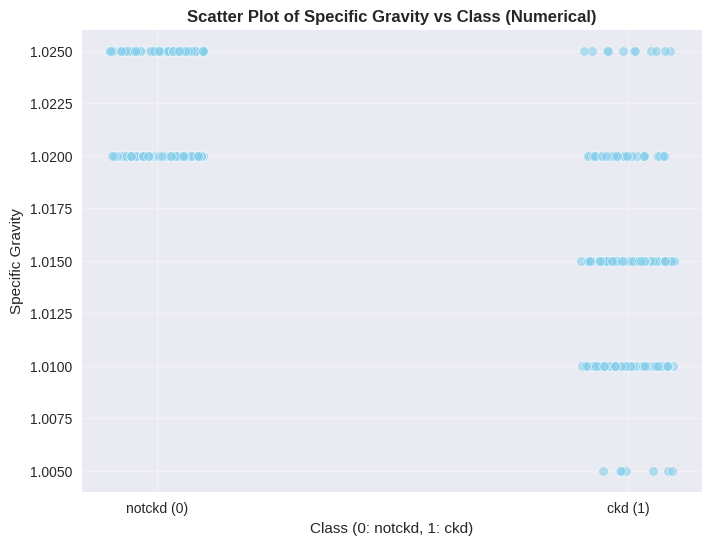

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a scatter plot of specific_gravity vs class_numerical
plt.figure(figsize=(8, 6))
# Add some jitter to the x-axis for better visualization of points at 0 and 1
sns.scatterplot(x=df['class_numerical'] + np.random.uniform(-0.1, 0.1, size=len(df)),
                y=df['specific_gravity'],
                alpha=0.6,
                color='skyblue')
plt.title('Scatter Plot of Specific Gravity vs Class (Numerical)', fontweight='bold')
plt.xlabel('Class (0: notckd, 1: ckd)')
plt.ylabel('Specific Gravity')
plt.xticks([0, 1], ['notckd (0)', 'ckd (1)']) # Label the x-axis ticks
plt.grid(True, alpha=0.3)
plt.show()

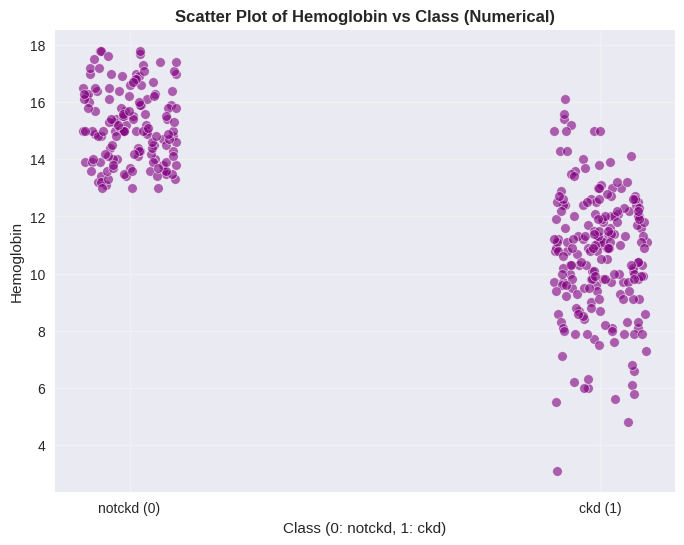

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a scatter plot of hemoglobin vs class_numerical
plt.figure(figsize=(8, 6))
# Add some jitter to the x-axis for better visualization of points at 0 and 1
sns.scatterplot(x=df['class_numerical'] + np.random.uniform(-0.1, 0.1, size=len(df)),
                y=df['hemoglobin'],
                alpha=0.6,
                color='purple') # Using a different color
plt.title('Scatter Plot of Hemoglobin vs Class (Numerical)', fontweight='bold')
plt.xlabel('Class (0: notckd, 1: ckd)')
plt.ylabel('Hemoglobin')
plt.xticks([0, 1], ['notckd (0)', 'ckd (1)']) # Label the x-axis ticks
plt.grid(True, alpha=0.3)
plt.show()

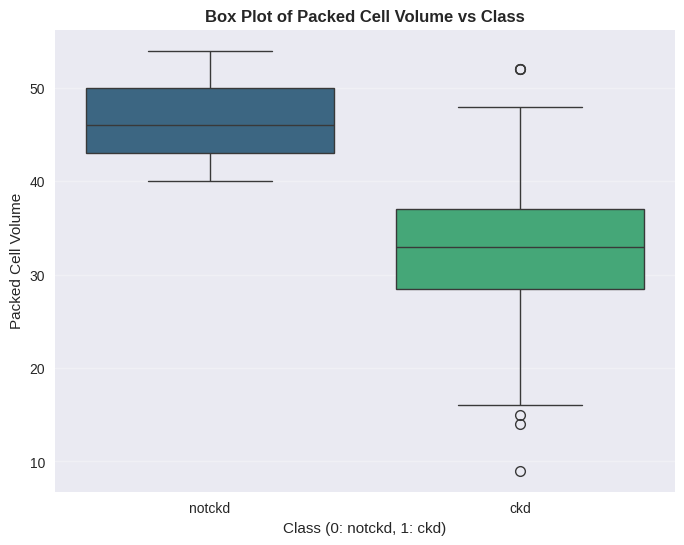

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot of packed_cell_volume vs class_numerical
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['class_numerical'], y=df['packed_cell_volume'], palette='viridis')
plt.title('Box Plot of Packed Cell Volume vs Class', fontweight='bold')
plt.xlabel('Class (0: notckd, 1: ckd)')
plt.ylabel('Packed Cell Volume')
plt.xticks([0, 1], ['notckd', 'ckd']) # Label the x-axis ticks
plt.grid(axis='y', alpha=0.3)
plt.show()

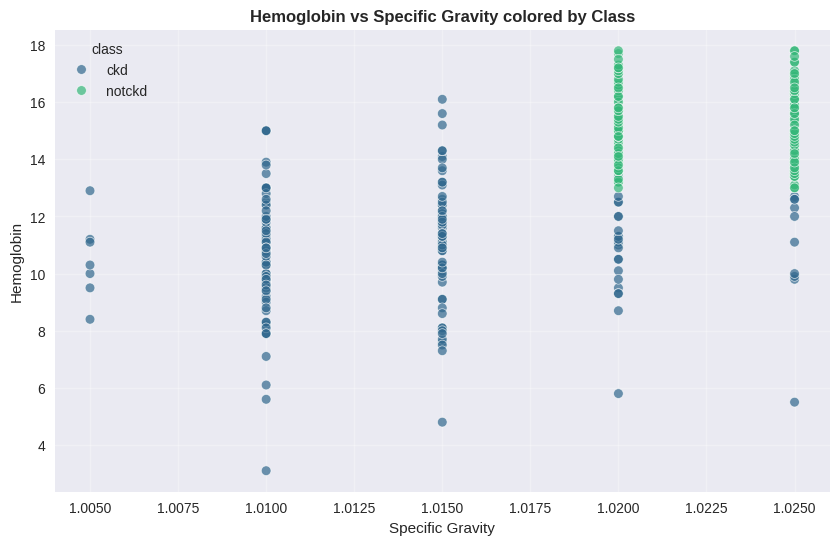

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of hemoglobin vs specific_gravity, colored by class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='specific_gravity', y='hemoglobin', hue='class', palette='viridis', alpha=0.7)
plt.title('Hemoglobin vs Specific Gravity colored by Class', fontweight='bold')
plt.xlabel('Specific Gravity')
plt.ylabel('Hemoglobin')
plt.grid(True, alpha=0.3)
plt.show()

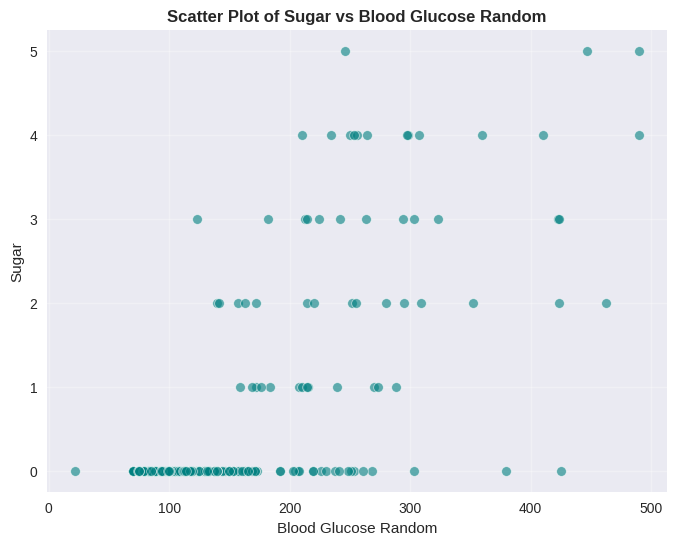

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of sugar vs blood_glucose_random
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='blood_glucose_random', y='sugar', alpha=0.6, color='teal')
plt.title('Scatter Plot of Sugar vs Blood Glucose Random', fontweight='bold')
plt.xlabel('Blood Glucose Random')
plt.ylabel('Sugar')
plt.grid(True, alpha=0.3)
plt.show()

## 6. Outlier Detection & Analysis

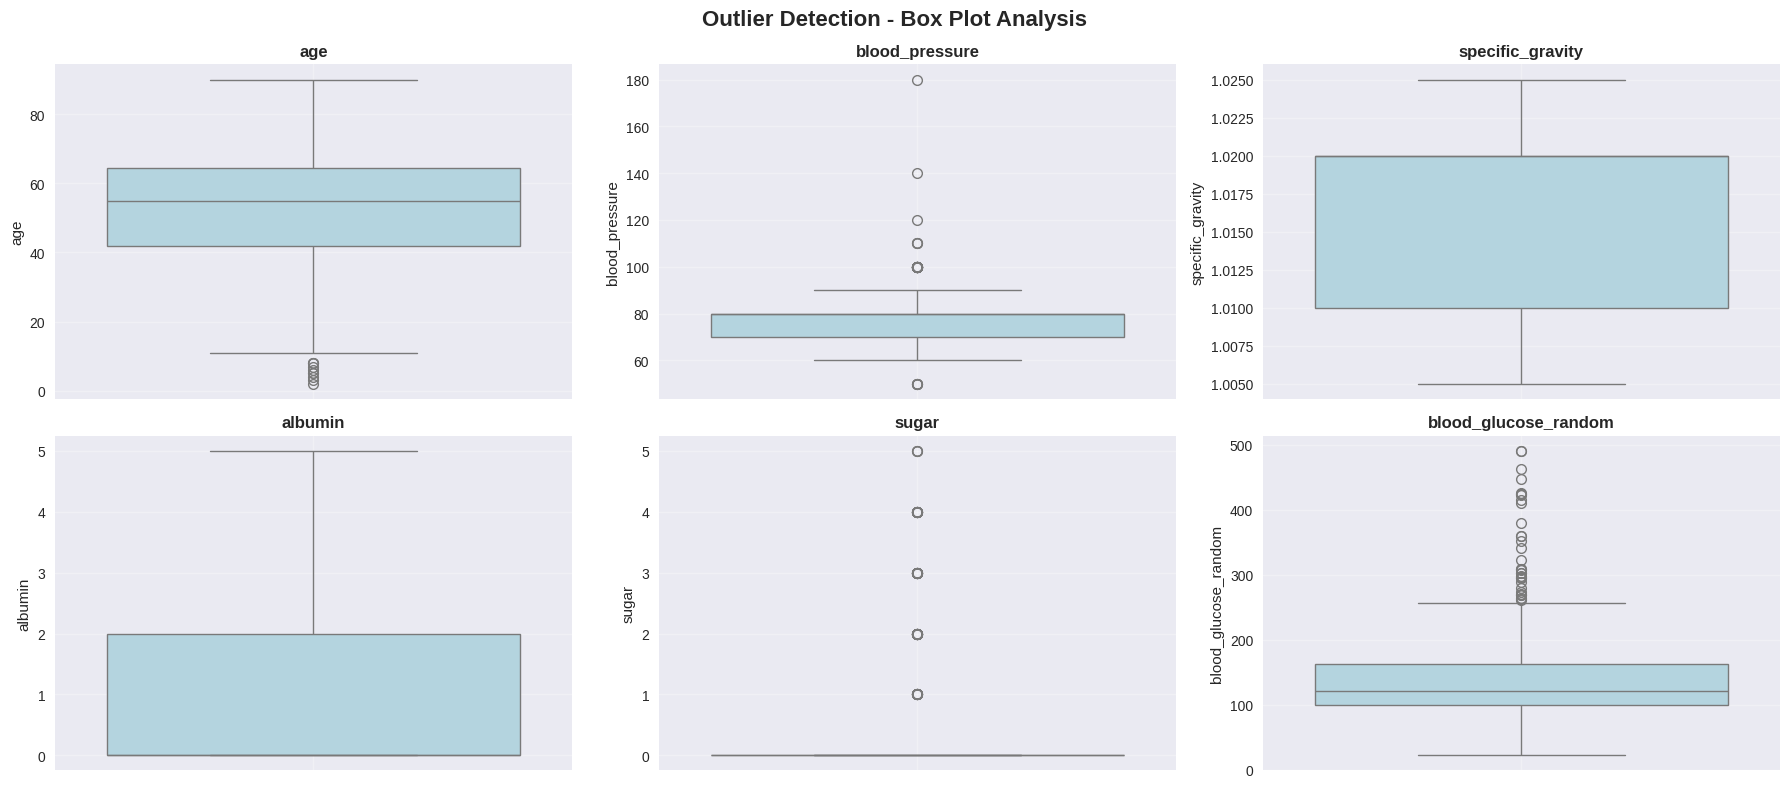

In [308]:
# Box plot analysis for outlier detection
if numeric_cols:
    n_vars = min(6, len(numeric_cols))
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols[:n_vars]):
        sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)

    # Hide unused subplots
    for i in range(n_vars, len(axes)):
        axes[i].axis('off')

    plt.suptitle('Outlier Detection - Box Plot Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [293]:
# Quantitative outlier analysis using IQR method
if numeric_cols:
    outlier_analysis = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
        outlier_count = len(outliers)
        outlier_percentage = round((outlier_count / len(df)) * 100, 2)

        outlier_analysis.append({
            'Variable': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_percentage,
            'Lower_Fence': round(lower_fence, 2),
            'Upper_Fence': round(upper_fence, 2)
        })

    outlier_summary = pd.DataFrame(outlier_analysis)
    outliers_detected = outlier_summary[outlier_summary['Outlier_Count'] > 0]

    if len(outliers_detected) > 0:
        print("Outlier Analysis Summary:")
        display(outliers_detected.sort_values('Outlier_Percentage', ascending=False))
    else:
        print("No significant outliers detected using IQR method.")

Outlier Analysis Summary:


,Variable,Outlier_Count,Outlier_Percentage,Lower_Fence,Upper_Fence
13,red_blood_cell_count,75,18.75,3.60,6.00
4,sugar,61,15.25,0.00,0.00
7,serum_creatinine,51,12.75,-1.95,5.65
6,blood_urea,38,9.50,-31.50,124.50
1,blood_pressure,36,9.00,55.00,95.00
5,blood_glucose_random,34,8.50,3.00,259.00
8,sodium,18,4.50,126.00,150.00
12,white_blood_cell_count,17,4.25,3337.50,13037.50
9,potassium,14,3.50,2.80,6.00
0,age,10,2.50,8.25,98.25


## Executive Summary & Recommendations

This exploratory data analysis (EDA) was conducted to understand the characteristics of the dataset, identify potential data quality issues, explore the distributions of individual variables, and examine the relationships between variables, with a particular focus on factors potentially associated with Chronic Kidney Disease (CKD).

### Key Findings:

**1. Data Quality and Preparation:**

*   The dataset contains 400 observations and 26 features (including the 'id' column, which was dropped).
*   Several columns exhibited a substantial percentage of missing values, with 'red_blood_cells', 'red_blood_cell_count', 'white_blood_cell_count', 'potassium', and 'sodium' having the highest proportions (over 20%). Missing values in these columns were imputed using the median for numerical variables and the mode for the categorical variable ('red_blood_cells').
*   Inconsistent values containing extra whitespace or hidden characters were identified and cleaned in the 'diabetes_mellitus', 'coronary_artery_disease', and 'class' columns to ensure data consistency.
*   No duplicate rows were found in the dataset.
*   The 'id' column was dropped as it is not relevant for predictive modeling or analysis.
*   A new numerical column 'class_numerical' was created, mapping 'ckd' to 1 and 'notckd' to 0, to facilitate quantitative analysis and modeling.

**2. Univariate Analysis:**

*   **Numerical Variables:**
    *   Distributions were visualized using histograms with KDEs, revealing varying shapes.
    *   Summary statistics (mean, median, standard deviation, quartiles, etc.) provided quantitative insights into central tendency and dispersion.
    *   CDF plots for 'age', 'hemoglobin', 'blood_glucose_random', 'blood_urea', and 'serum_creatinine' illustrated the cumulative probability distributions. Key probabilities were calculated, such as the probability of age being within certain ranges or hemoglobin/serum creatinine exceeding specific thresholds.
    *   Skewness and kurtosis calculations highlighted the asymmetry and tailedness of numerical distributions. Variables like 'serum_creatinine', 'sodium', and 'potassium' showed high skewness and kurtosis, indicating potential outliers and non-normal distributions.
    *   Detailed quantile analysis for 'serum_creatinine', 'age', and 'hemoglobin' provided a granular view of data spread and extreme values.
*   **Categorical Variables:**
    *   Bar plots and Probability Mass Functions (PMFs) for variables like 'diabetes_mellitus', 'hypertension', 'pus_cell', 'pedal_edema', and 'class' showed the proportion of observations in each category. The PMF of 'class' revealed the class distribution in the dataset.

**3. Multivariate Analysis:**

*   A correlation heatmap for numerical variables revealed relationships between features.
*   Strong correlations (|r| > 0.7) were identified between:
    *   'specific_gravity' and 'class_numerical' (-0.732)
    *   'sugar' and 'blood_glucose_random' (0.718)
    *   'hemoglobin' and 'packed_cell_volume' (0.895)
    *   'hemoglobin' and 'class_numerical' (-0.769)
    *   'packed_cell_volume' and 'red_blood_cell_count' (0.703)
    *   'packed_cell_volume' and 'class_numerical' (-0.741)
*   Visualizations exploring relationships between key variables and 'class_numerical' (scatter plots, box plots) further illustrated these associations. For example, box plots showed clear differences in the distributions of 'hemoglobin' and 'packed_cell_volume' between the 'ckd' and 'notckd' classes. Scatter plots like 'hemoglobin' vs 'specific_gravity' colored by class revealed clustering patterns related to disease status.
*   CDF plots of 'hemoglobin' and 'albumin' separated by 'class_numerical' visually demonstrated how the distributions of these key indicators differ significantly between CKD and non-CKD patients.

**4. Outlier Detection:**

*   Box plots visually indicated the presence of outliers in several numerical columns.
*   Quantitative outlier analysis using the IQR method confirmed the presence of outliers in multiple numerical variables, most notably in 'red_blood_cell_count', 'sugar', and 'serum_creatinine'.

### Recommendations:

1.  **Address Remaining Missing Values:** While columns with >20% missing data were imputed, consider strategies for handling missing values in other columns. Depending on the modeling approach, imputation techniques like K-Nearest Neighbors (KNN) or Multiple Imputation by Chained Equations (MICE) could be explored.
2.  **Investigate and Potentially Treat Outliers:** Given the presence of significant outliers in several key numerical variables, investigate their nature. Consider strategies for handling outliers, such as capping, transformation (e.g., log transformation for highly skewed variables like 'serum_creatinine'), or using robust statistical methods that are less sensitive to outliers.
3.  **Further Multivariate Exploration:** Explore relationships between categorical variables and the target variable ('class') using techniques like grouped bar plots or chi-squared tests. Investigate potential interactions between features.
4.  **Feature Engineering:** Based on the observed distributions and relationships, consider creating new features that might improve model performance. For example, creating interaction terms or polynomial features for highly correlated variables.
5.  **Prepare for Modeling:** The cleaned and preprocessed data is now suitable for building predictive models to classify CKD. Consider splitting the data into training, validation, and testing sets. Address potential issues like multicollinearity if highly correlated features are used in certain models.

This comprehensive EDA provides a strong foundation for subsequent data preprocessing and predictive modeling tasks aimed at building a robust CKD classification model.